**PICOCTF ASSIGNMENT**

Nahomy Varada Salazar (00211623) & Atik J. Santellán (00326859)

**Class:** Computer Security (NRC: 1230)

**Professor:** Alejandro Proaño, PhD

March, 2025


# INTERENCDEC

**Approach 1: Python**

In this approach, we first decode the given text from Base64 using a simple Python script. Then, we apply a Caesar cipher decryption using an online tool.

*Decode from Base64*

We assume the given text is encoded in Base64, so we decode it using Python, we do it twice since we detected Base64 after the first iteration.

In [1]:
import base64

# Given encoded message
encoded_text = "YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclh6YzRNalV3YUcxcWZRPT0nCg=="

# First Base64 decoding
decoded_once = base64.b64decode(encoded_text).decode()
print("First Decoded Text:", decoded_once)

# Clean the string
cleaned_decoded_once = decoded_once.strip()[2:-1]

# Second Base64 decoding
decoded_twice = base64.b64decode(cleaned_decoded_once).decode()
print("Final Decoded Text:", decoded_twice)


First Decoded Text: b'd3BqdkpBTXtqaGx6aHlfazNqeTl3YTNrXzc4MjUwaG1qfQ=='

Final Decoded Text: wpjvJAM{jhlzhy_k3jy9wa3k_78250hmj}


In [2]:
def caesar_decrypt(text, shift):
    decrypted = ''.join(
        chr((ord(c) - shift - 65) % 26 + 65) if c.isupper() else
        chr((ord(c) - shift - 97) % 26 + 97) if c.islower() else c
        for c in text
    )
    return decrypted

for i in range(1,26):
    flag = caesar_decrypt(decoded_twice, i)
    if "picoCTF" in flag:
        print(flag)
        break


picoCTF{caesar_d3cr9pt3d_78250afc}


**Approach 2: CyberChef (Automated Online Solution)**

In this approach, we use CyberChef, a powerful online tool that allows us to perform multiple transformations in a single workflow. We will decode the double Base64 and decrypt the Caesar cipher in one pipeline.

In the input box, paste the given encoded text:
`
YidkM0JxZGtwQlRYdHFhR3g2YUhsZmF6TnFlVGwzWVROclh6YzRNalV3YUcxcWZRPT0nCg==
`

In the Recipe Panel, add the following operations:

    "From Base64" → (Decodes the first layer)
    "From Base64" → (Decodes the second layer)
    "ROT-N (Brute-force all shifts)" → (Tries all possible Caesar shifts)

Look through the output and find the correctly decrypted flag.

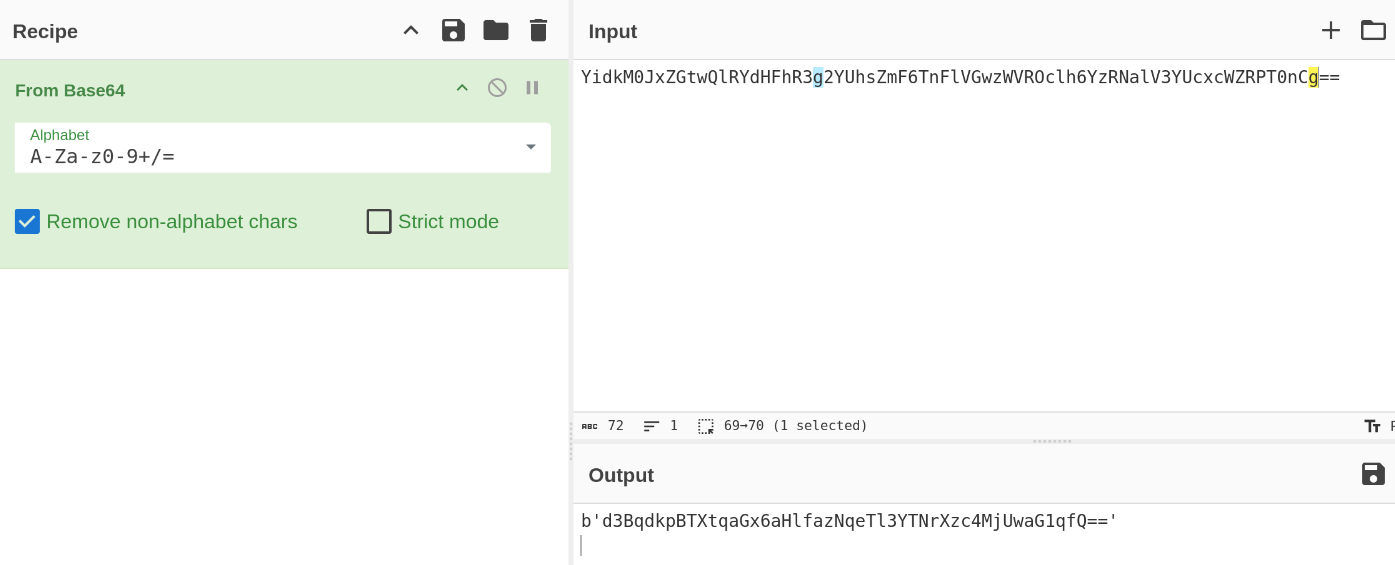

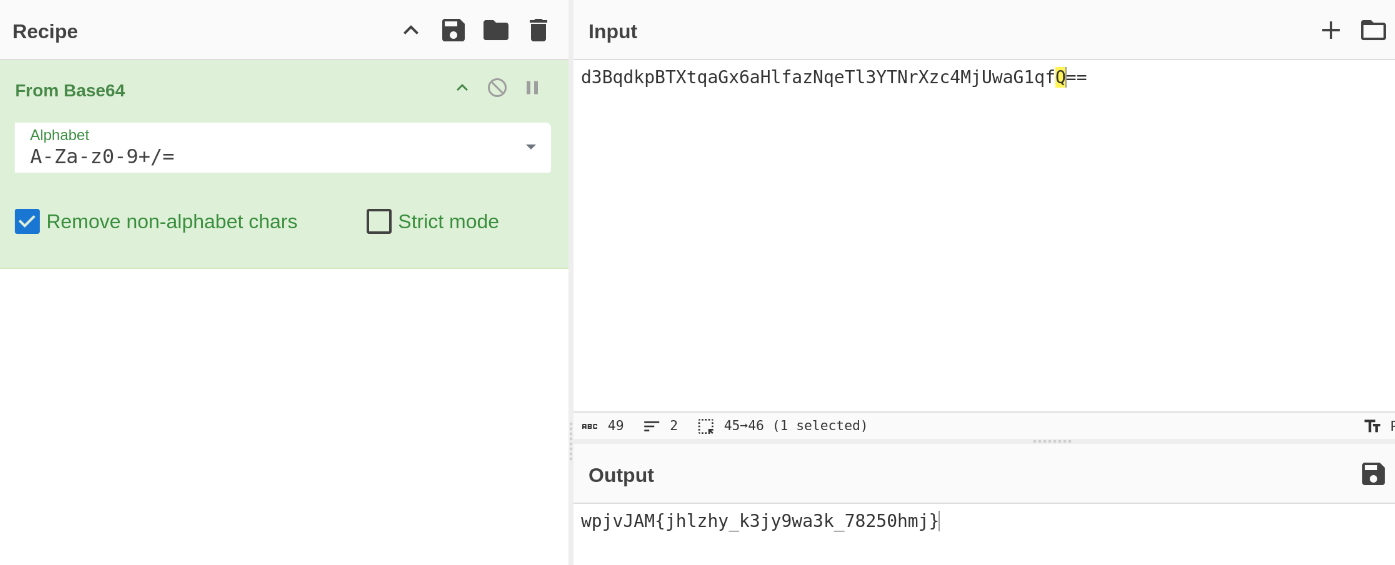

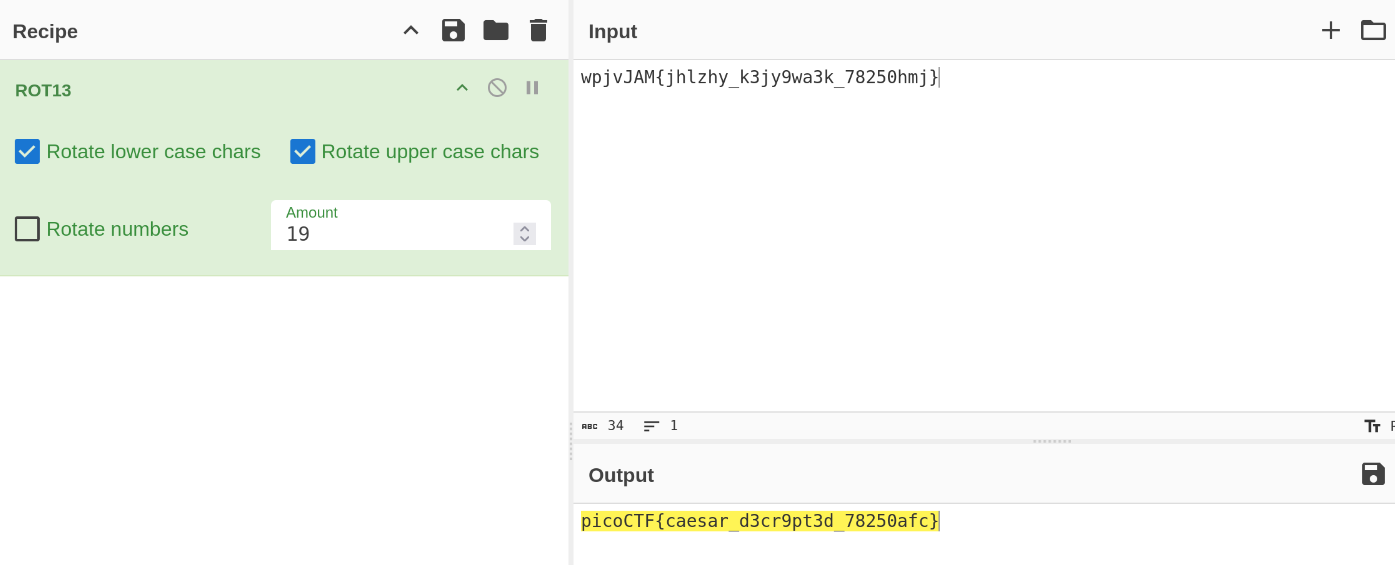

# THE NUMBERS

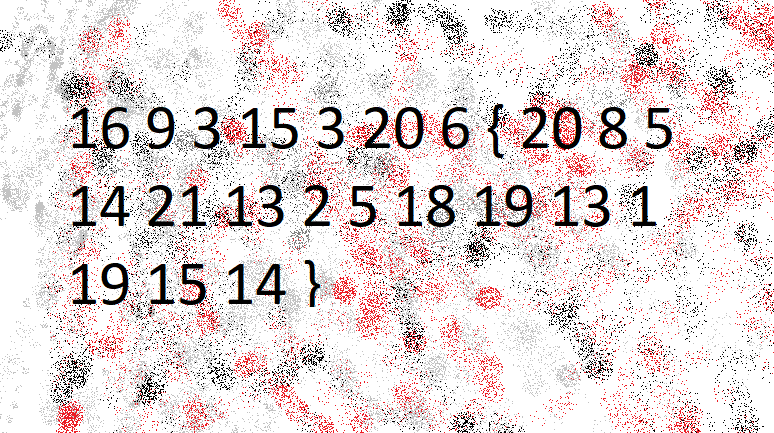


The given numbers appear to be letter positions in the alphabet (A=1, B=2, ..., Z=26). We convert them to letters using a simple Python script.

In [3]:
numbers = [16, 9, 3, 15, 3, 20, 6, 20, 8, 5, 14, 21, 13, 2, 5, 18, 19, 13, 1, 19, 15, 14]

# Convert numbers to letters (A=1, B=2, ..., Z=26)
decoded_text = ''.join(chr(n + 64) for n in numbers)

print("Decoded Text:", decoded_text)


Decoded Text: PICOCTFTHENUMBERSMASON


**Approach 2: Bash - Using tr for Quick Conversion**

For a quick solution in Linux/macOS, we can use tr with a lookup table (it was tested in a terminal running Fedora).


In [4]:
%%bash
echo "16 9 3 15 3 20 6 20 8 5 14 21 13 2 5 18 19 13 1 19 15 14" | 
awk '{for(i=1; i<=NF; i++) printf "%c", $i+64; print ""}'


PICOCTFTHENUMBERSMASON


# C3

**Approach 1: Reverse the Encoder using Python**

Since we have access to convert.py, we can reverse the encoding process by inverting its logic.

*Understand the Encoding Mechanism*

    The encoder maps characters from lookup1 to lookup2 using an incremental shift (prev value).
    Each character in the plaintext is replaced based on its position in lookup1 and mapped cyclically to lookup2.
    The transformation is cumulative, meaning each character's encryption depends on the previous one.

To decrypt, we:

    Extracted the ciphertext from the file.
    Reversed the shifting process to recover the original text.

In [5]:
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

def decrypt_cyclical_cipher(ciphertext):
    out = ""
    prev = 0

    for char in ciphertext:
        if char not in lookup2:  # Ignore invalid characters
            continue
        cur = lookup2.index(char)
        original_index = (cur + prev) % 40  # Reverse the shift
        out += lookup1[original_index]
        prev = original_index  # Update prev for next iteration

    return out.strip()  # Remove unwanted whitespace

with open("ciphertext", "r") as f:
    encrypted_text = f.read().strip()

decrypted_step = decrypt_cyclical_cipher(encrypted_text)
step = decrypted_step
print(step)


#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1


But this is not the flag. Since this code is for Python 2, we rewrite it for Python 3:

In [6]:
chars = step # over step

b = 1
output_chars = []
length = len(chars)

while True:
    index = b ** 3
    if index >= length:
        break  # Stop if index exceeds length
    output_chars.append(chars[index])  # Extract character
    b += 1

# Print the final extracted string
print("Final flag:", "picoCTF{" + "".join(output_chars) + "}")


Final flag: picoCTF{adlibs}


*Summary*

- Decrypt the ciphertext (here we find step)
- Extract cubic indices from the decrypted text (from step using step)

In [7]:
# All-in-one cell

# Step 1: Read the ciphertext
with open("ciphertext", "r") as f:
    chars = f.read()

# Lookup tables from convert.py
lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

# Step 2: Decrypt the text
out = ""
prev = 0

for char in chars:
    if char in lookup2:
        cur = lookup2.index(char)
        original_index = (cur + prev) % 40  # Reverse transformation
        out += lookup1[original_index]
        prev = original_index
    else:
        out += char  # Preserve unknown characters

# Step 3: Extract cubic index characters from decrypted text
b = 1
output_chars = []
length = len(out)

while True:
    index = b ** 3
    if index >= length:
        break 
    output_chars.append(out[index])  
    b += 1

print("Final flag:", "picoCTF{" + "".join(output_chars) + "}")


Final flag: picoCTF{adlibs}


**Approach 2: Encryption Simulation and Verification**

Instead of trying to directly reverse the algorithm, this approach:

- *Simulates the encryption process*: It implements the original encryption algorithm from convert.py
- *Uses constraint satisfaction*: For each character in the ciphertext, it tries all possible characters from lookup1 and checks which one would produce the correct ciphertext when encrypted
- *Verifies the solution*: After decryption, it re-encrypts the result to confirm the solution is correct

The key insight here is that we're working with a deterministic cipher where each character depends on the previous one. Instead of trying to directly invert the mathematical operation, we're systematically testing which input character would produce the correct output character given the current state of the cipher.

This method is similar to how cryptanalysts might approach a black-box cipher when they have access to an encryption oracle but not the full algorithm. It's also more robust against potential mathematical errors in directly implementing the inverse operation.

In [17]:
import string

lookup1 = "\n \"#()*+/1:=[]abcdefghijklmnopqrstuvwxyz"
lookup2 = "ABCDEFGHIJKLMNOPQRSTabcdefghijklmnopqrst"

with open("ciphertext", "r") as f:
    target_ciphertext = f.read().strip()

# Function to encode text using the original algorithm
def encode(text):
    out = ""
    prev = 0
    for char in text:
        if char in lookup1:
            cur = lookup1.index(char)
            out += lookup2[(cur - prev) % 40]
            prev = cur
    return out

# Function to decode text by trying different characters
def decode_by_simulation(ciphertext):
    result = ""
    prev = 0
    
    for i, char in enumerate(ciphertext):
        if char not in lookup2:
            continue
            
        # Find the position in lookup2
        lookup2_pos = lookup2.index(char)
        
        # Try all possible characters from lookup1
        for potential_char in lookup1:
            potential_pos = lookup1.index(potential_char)
            # Check if this character would encode correctly
            if lookup2[(potential_pos - prev) % 40] == char:
                # This character works!
                result += potential_char
                prev = potential_pos
                break
    
    return result

# Decode the ciphertext using our simulation method
decrypted_text = decode_by_simulation(target_ciphertext)
print("Decrypted text:")
print(decrypted_text)


Decrypted text:
#asciiorder
#fortychars
#selfinput
#pythontwo

chars = ""
from fileinput import input
for line in input():
    chars += line
b = 1 / 1

for i in range(len(chars)):
    if i == b * b * b:
        print chars[i] #prints
        b += 1 / 1



In [18]:
# Extract flag from cubic indices (the same as the first approach)
def extract_from_cubic_indices(text):
    flag_chars = []
    b = 1
    
    while True:
        index = b**3
        if index >= len(text):
            break
        flag_chars.append(text[index])
        b += 1
        
    return "".join(flag_chars)

flag = extract_from_cubic_indices(decrypted_text)
print("\nExtracted flag:")
print(f"picoCTF{{{flag}}}")

# Verify our solution by encoding the decrypted text
verification = encode(decrypted_text)
print("\nVerification:")
print("Original ciphertext length:", len(target_ciphertext))
print("Re-encoded text length:", len(verification))
print("Match:", verification == target_ciphertext)

# If not a perfect match, check how many characters match
if verification != target_ciphertext:
    matching = sum(1 for a, b in zip(verification, target_ciphertext) if a == b)
    print(f"Matching characters: {matching}/{min(len(verification), len(target_ciphertext))}")


Extracted flag:
picoCTF{adlibs}

Verification:
Original ciphertext length: 237
Re-encoded text length: 237
Match: True


# Hide to See

**Approach 1: Using steghide in Fedora (Command Line / Bash)**

We will use `steghide` to extract hidden data from the image. `steghide` is a steganography tool that can hide and extract data in image and audio files.


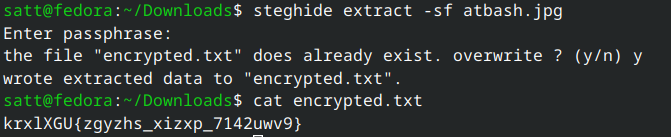

krxlXGU{zgyzhs_xizxp_7142uwv9}


Now we use atbash to find the flag:

Atbash is a simple substitution cipher where the alphabet is reversed:

    'A' ↔ 'Z'
    'B' ↔ 'Y'
    'C' ↔ 'X'
    ...
    'Y' ↔ 'B'
    'Z' ↔ 'A'

For lowercase letters, the transformation is:

    'a' ↔ 'z'
    'b' ↔ 'y'
    'c' ↔ 'x'
    ...

Numbers and special characters remain unchanged.

In [24]:
def atbash_cipher(text):
    atbash_transformed = []
    
    for char in text:
        if char.isalpha():  # Apply transformation only to letters
            if char.islower():
                new_char = chr(219 - ord(char))  # 'a' (97) -> 'z' (122)
            else:
                new_char = chr(155 - ord(char))  # 'A' (65) -> 'Z' (90)
        else:
            new_char = char  # Keep digits and special characters unchanged

        atbash_transformed.append(new_char)

    return ''.join(atbash_transformed)


In [25]:
extracted_text = "krxlXGU{zgyzhs_xizxp_7142uwv9}"
decoded_text = atbash_cipher(extracted_text)
print("Decoded Text:", decoded_text)


Decoded Text: picoCTF{atbash_crack_7142fde9}


**Approach 2: ASCII Table Transformation**

Instead of subtracting from fixed numbers (219 for lowercase, 155 for uppercase), we can use a mapping approach that builds a translation table dynamically.

In [30]:
def atbash_cipher_fixed(text):
    alphabet_upper = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    alphabet_lower = "abcdefghijklmnopqrstuvwxyz"

    reversed_upper = alphabet_upper[::-1]  # Reverse uppercase alphabet
    reversed_lower = alphabet_lower[::-1]  # Reverse lowercase alphabet

    # Create separate translation tables for uppercase and lowercase
    atbash_table = str.maketrans(alphabet_upper + alphabet_lower, reversed_upper + reversed_lower)

    # Translate the text using the table
    return text.translate(atbash_table)

In [33]:
extracted_text = "krxlXGU{zgyzhs_xizxp_7142uwv9}"
decoded_text = atbash_cipher_fixed(extracted_text)
print("Decoded Text:", decoded_text)

Decoded Text: picoCTF{atbash_crack_7142fde9}


Why Use This Approach?

    str.maketrans creates a fast, efficient lookup table for character substitution.
    No need to check ord() values manually.
    Python's .translate() method applies the transformation in a single step.

We tried different techniques besides steghide, but it seemed to be the best path for this problem.

# RSA Oracle

**Approach 1: RSA's multiplicative homomorphism**

Summary of the Challenge

    We have intercepted an RSA-encrypted message (password.enc) and its ciphertext.
    The challenge provides an oracle that can:
        Encrypt a plaintext message (E(m))
        Decrypt a given ciphertext (D(c))
    We exploit RSA's multiplicative homomorphism to recover the password and decrypt the final message (secret.enc).

RSA encryption formula:

$c=m^e \mod  n$

$c=m^e \mod n$

For two messages $m_1$ and $m_2$, the homomorphic property states:

$E(m_1) \cdot E(m_2) ≡ E(m_1 \cdot m_2) \mod  n$

$E(m_1) \cdot E(m_2)≡E(m_1 \cdot m_2) \mod n$

This means that multiplying two ciphertexts results in the encryption of the product of the plaintexts.

*To Exploiting the Oracle:*

- Pick a known message (e.g., "a") and get its encryption ($E(m_1) = c1$).
- Multiply the intercepted ciphertext (c) with $c_1$, forming $c_2 = c \cdot c_1$.
- Ask the oracle to decrypt $c_2$, getting $D(c_2) = m_2$, which is $m \cdot m_1$.
- Recover the password by computing:
 $m = \frac{m_2}{m_1}$

- Use the password to decrypt secret.enc

We do this changing messages between the oracle and the following piece of code:

In [36]:
from subprocess import run, PIPE

# Load the encrypted password
with open("password.enc", "r") as file:
    encrypted_password = int(file.read())

print("=== Phase 1: Recovering the Password ===\n")

print(f"Ciphertext (c) = {encrypted_password}\n")

# Get a known plaintext message from the user
plaintext_message = input("Enter a known message (m1): ")
m1_ascii = ord(plaintext_message)

print(f"Requesting encryption for message (m1): {plaintext_message}\n")
c1 = int(input("Enter the encrypted output from the oracle (c1 = E(m1)): "))

# Construct a modified ciphertext using RSA's homomorphic property
c2 = encrypted_password * c1
print(f"Requesting decryption for modified ciphertext (c2 = c * c1): {c2}\n")

# Get the decrypted output and convert from HEX
m2_hex = input("Enter decrypted value in HEX format (m2 = D(c2)): ")
m2 = int(m2_hex, 16)

# Recover the original password
password_int = m2 // m1_ascii
password = password_int.to_bytes(len(str(password_int)), "big").decode("utf-8").lstrip("\x00")

print(f"Recovered Password: {password}\n")
print("=" * 50)

print("=== Phase 2: Decrypting the Secret File ===\n")

# Use OpenSSL to decrypt the secret file with the recovered password
decryption_result = run(
    ["openssl", "enc", "-aes-256-cbc", "-d", "-in", "secret.enc", "-pass", f"pass:{password}"],
    stdout=PIPE, stderr=PIPE, text=True
)

print(decryption_result.stdout)


=== Phase 1: Recovering the Password ===

Ciphertext (c) = 873224563026311790736191809393138825971072101706285228102516279725246082824238887755080848591049817640245481028953722926586046994669540835757705139131212



Enter a known message (m1):  a


Requesting encryption for message (m1): a



Enter the encrypted output from the oracle (c1 = E(m1)):  1894792376935242028465556366618011019548511575881945413668351305441716829547731248120542989065588556431978903597240454296152579184569578379625520200356186


Requesting decryption for modified ciphertext (c2 = c * c1): 1654579245374863380116520579044322357142195197975098865920568334219864905213447287275954994939383811608813422021215575930875353985873254535434835456586499020739740956904167950930371925999309739633810358681845376711949047859870374458686957738610844765998834500752829202477245578132025141560925519168989877432



Enter decrypted value in HEX format (m2 = D(c2)):  15ac17f82853


Recovered Password: 92d53

=== Phase 2: Decrypting the Secret File ===

picoCTF{su((3ss_(r@ck1ng_r3@_92d53250}


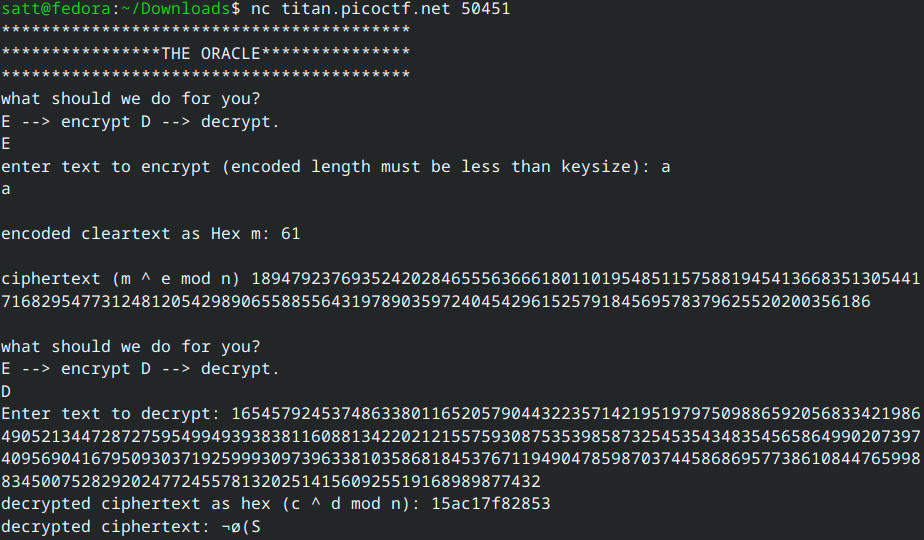

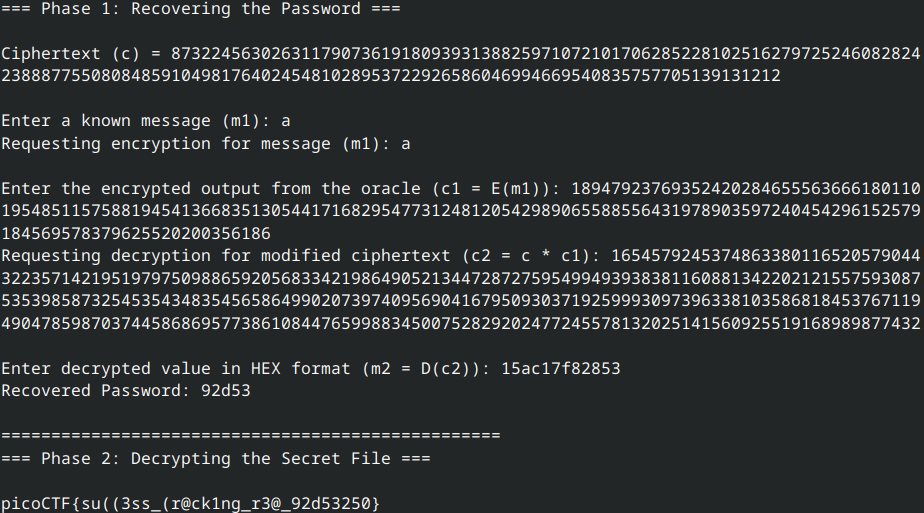



picoCTF{su((3ss_(r@ck1ng_r3@_92d53250}

**Approach 2: Exploiting RSA's Homomorphic Property Using pwntools**

In this approach, we leverage RSA's multiplicative homomorphism to recover the encryption password using a remote oracle. The oracle allows us to:

    Encrypt arbitrary messages (E(m) = m^e mod n).
    Decrypt given ciphertexts (D(c) = c^d mod n).

**The Key Idea is the same as the previous one, but is executed in a different approach**

Since RSA is multiplicatively homomorphic, we can manipulate ciphertexts:

- Given a known message $m_1$, we compute its encryption $c_1=E(m_1)$.
- We modify the intercepted ciphertext $c$ by multiplying it with $c_1$, obtaining $c_2=c \cdot c_1$.
- The oracle decrypts $c_2$, revealing $m_2=D(c_2)$, which simplifies to:

  $m_2=D(c \cdot c_1)= m \cdot m_1$

Since we know $m_1$, we can recover the original password using:
    
$m=\frac{m_2}{m_1}$

*Automating the Attack*

Using pwntools, we:

    Establish a remote connection with the oracle.
    Request encryption of a small known value (e.g., m1 = 2).
    Modify the intercepted ciphertext by multiplying it with the encryption result of m1.
    Request decryption of the manipulated ciphertext.
    Recover the password by dividing the decrypted result by m1.
    Use the extracted password to decrypt the final message.

This method automates the process of exploiting the oracle, making it efficient and scalable for similar RSA-based challenges.

In [39]:
from pwn import *

context.log_level = 'critical'
connection = remote("titan.picoctf.net", 63413)

# Wait for the prompt
connection.recvuntil(b"decrypt.")

# Read the encrypted password from file
with open("password.enc") as file:
    encrypted_value = int(file.read())

# Request encryption of a small known value
connection.sendline(b"E")
connection.recvuntil(b"keysize): ")
connection.sendline(b"\x02")
connection.recvuntil(b"mod n) ")

encrypted_two = int(connection.recvline())

# Request decryption of the manipulated ciphertext
connection.sendline(b"D")
connection.recvuntil(b"decrypt: ")
connection.sendline(str(encrypted_two * encrypted_value).encode())
connection.recvuntil(b"mod n): ")

# Recover the password
password_int = int(connection.recvline(), 16) // 2
password = password_int.to_bytes(len(str(password_int)) - 7, "big").decode("utf-8")

print("Recovered Password:", password)

Recovered Password: 92d53


In [40]:
!openssl enc -aes-256-cbc -d -in secret.enc

enter AES-256-CBC decryption password:
bad password read


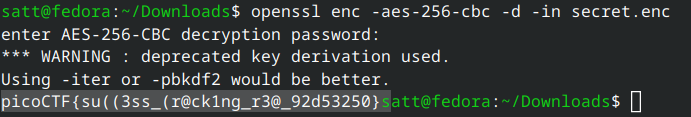

picoCTF{su((3ss_(r@ck1ng_r3@_92d53250}